# Guided Project 2.1.1.

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# I. Wrangle Data

In [41]:
import pandas as pd
import numpy as np

def wrangle(filepath):
  df = pd.read_csv(filepath,
                   dtype={'YEAR_BUILT': int,
                          'ZIP_CODE'  : int},
                   parse_dates=['SALE_DATE'],
                   index_col='SALE_DATE')
  
  # Drop constant and high-cardinality categorical features
  df.drop(columns=['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
                   'ADDRESS', 'APARTMENT_NUMBER'], inplace=True)
  return df

In [42]:
df = wrangle(DATA_PATH + 'condos/tribeca.csv')

In [43]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013,1840.0,1909,2800000
2019-01-07,10004,1759.0,0,2650000
2019-01-09,10004,1190.0,2005,1005000
2019-01-10,0,1088.0,2006,1678000
2019-01-11,10280,873.0,0,1380000


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [49]:
X = df[['GROSS_SQUARE_FEET']] # Feature Matrix always needs two dimensions.
y = df['SALE_PRICE'] # Target Vector always needs one dimension.

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [62]:
from sklearn.metrics import mean_absolute_error

print('Mean Condo Price:', y.mean())
y_pred = [y.mean()] * len(y)

print('Baseline MAE:', mean_absolute_error(y, y_pred))

Mean Condo Price: 3928736.3666666667
Baseline MAE: 2783380.1977777784


# IV. Build Model

In [65]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate my predictor
model = LinearRegression()

# Step 3: FIT my predictor on the (training) data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

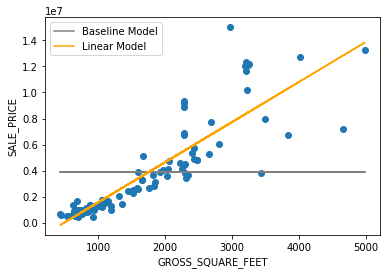

In [68]:
import matplotlib.pyplot as plt
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], y_pred, label='Baseline Model', color='grey')
plt.plot(X, model.predict(X), label='Linear Model', color='orange')
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')
plt.legend();

# V. Check Metrics

In [69]:
print('Training MAE:', mean_absolute_error(y, model.predict(X)))

Training MAE: 1176817.9930150746


# VI. Communicate Results